<a href="https://colab.research.google.com/github/nicolegold/ProcessamentoImagens/blob/main/ProcessamentoImagens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processamento de Imagens com Python

Processar uma imagem significa modificar ou extrair suas informações.

In [87]:
#Essa biblioteca nos permite fazer a manipulação de imagens a partir de um script Python.
!pip install pillow
import PIL

# Trabalhando com o PIL

In [88]:
# Classe para fazer a manipulação de imagens:
from PIL import Image

# Carregar um imagem a partir do disco:
image = Image.open("urso1.jpg")

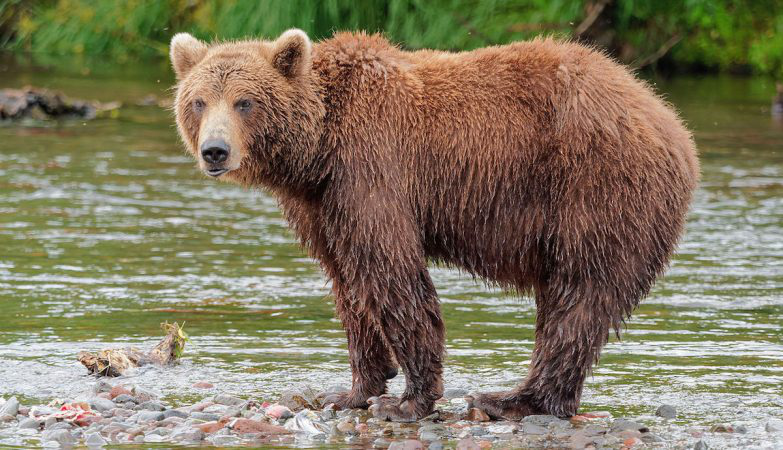

In [89]:
image

# Exibindo as propriedades da imagem

In [90]:
print(image.format)

JPEG


In [91]:
print(image.mode)
#O propósito principal do sistema RGB é a reprodução de cores em dispositivos eletrônicos.

RGB


In [92]:
print(image.size)

(783, 450)


# Pixel e Estrutura de Dados de Imagens

Pixel é a menor unidade de informação que compõe uma imagem digital.

Em uma imagem RGB o pixel é representado por três números de 8 bits associados com as cores R,G e B que correspondem as cores Red (Vermelho), Green (Verde) e Blue (Azul) respectivamente.

Como são números de 8 bits a faixa de valores é de 0 até 255.

A cor do Pixel será gerada a partir da combinação de cada um dos canais.

Se a combinação de valores for 255 a cor do pixel será branco, se a combinação for 0, a cor do Pixel será preto.

# Convertendo Imagens para arrays Numpy

As imagens digitais nada mais são do que matrizes com números e para trabalhar com dados desse tipo nos temos a biblioteca Numpy do Python.

In [93]:
# Importando as bibliotecas para visualização das imagens:
from matplotlib import image
from matplotlib import pyplot

In [94]:
# Carregando imagem como um array NumPy:
data = image.imread("urso1.jpg")

In [95]:
# Imprimindo o conteúdo do array NumPy:
print(data)

[[[ 42  60  20]
  [ 40  56  19]
  [ 44  60  24]
  ...
  [ 55  69  10]
  [ 54  68   9]
  [ 52  68   6]]

 [[ 42  60  20]
  [ 46  64  26]
  [ 51  67  31]
  ...
  [ 60  74  15]
  [ 59  73  14]
  [ 58  74  12]]

 [[ 42  63  22]
  [ 51  72  33]
  [ 60  77  41]
  ...
  [ 66  79  23]
  [ 63  78  19]
  [ 63  78  19]]

 ...

 [[167 170 159]
  [173 177 163]
  [180 184 169]
  ...
  [211 215 226]
  [216 220 231]
  [222 224 236]]

 [[145 156 100]
  [152 163 105]
  [157 168 108]
  ...
  [221 225 234]
  [221 224 233]
  [224 227 236]]

 [[161 172 116]
  [165 176 118]
  [166 177 117]
  ...
  [206 210 219]
  [200 203 212]
  [198 201 210]]]


Observe que para cada linha nos temos 3 valores que correspondem as tonalidades das cores RGB e cada uma dessas linhas corresponde a 1 pixel.

In [96]:
# Imprimindo as propriedades do array de pixels:
print(data.dtype)

print(data.shape)

print(data.max())

print(data.min())

uint8
(450, 783, 3)
255
0


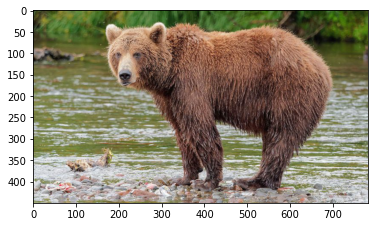

In [97]:
# Exibindo o array de pixels como uma imagem:
pyplot.imshow(data)

# Convertendo o array de pixels em um objeto Image Pillow

In [98]:
image2 = Image.fromarray(data)

# Verificando o tipo do objeto:
type(image2)

PIL.Image.Image

PIL.Image.Image

# Convertendo um objeto do tipo imagem para um array numpy

In [99]:
from numpy import asarray
image = Image.open("urso1.jpg")

# Método asarray para realizar a conversão:
data = asarray(image)

In [100]:
# Imprimindo os atributos do array:
print(data.dtype)
print(data.shape)

uint8
(450, 783, 3)


Salvando imagens em disco


In [101]:
# Salvando a imagem no formato PNG:
image.save("urso1.png",format="PNG")

In [102]:
# Salvando a imagem no formato GIF:
image.save("urso1.gif",format="GIF")

In [103]:
# Carregando novamente a imagem e verificando o formato:
image3 = Image.open("urso1.gif")
print(image3.format)

GIF


# Convertendo imagens

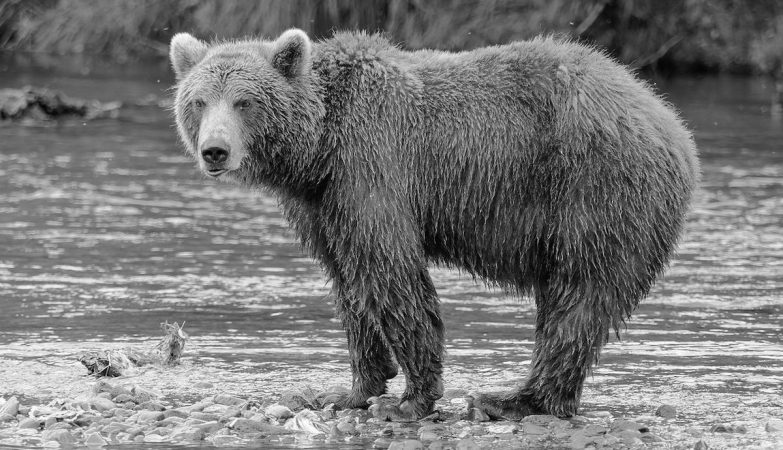

In [104]:
# Convertendo a imagem em escala de cinza:
image_cinza = image.convert(mode="L")
image_cinza

In [105]:
# Salvando a imagem em disco:
image_cinza.save("urso1-cinza.jpg")

Na conversão da imagem para escala de cinza temos uma perda de dados, pois deixamos de ter as informações das cores , teremos somente intensidades de preto e branco.

Mais essa conversão é importante porque alguns métodos e algoritmos exigem que a imagem esteja nesta escala.

# Resize Imagens

Nesse processo geramos imagens com dimensões menores. Você pode definir valores para deixar a sua imagem ou imagens em um determinado padrão.

In [106]:
# Verificando o tamanho da imagem com o atributo size:
print(image.size)

(639, 358)

(783, 450)


(639, 358)

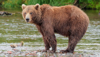

In [107]:
# Gerando thumbnail de tamanho 100x100:
image.thumbnail((100,100))
image

In [108]:
# Verificando as novas dimensões:
print(image.size)

(100, 56)

(100, 57)


(100, 56)

Parece que algo deu errado, apesar de ter especificado no parâmetro thumbnail() que a imagem deveria ter a dimensão de (100,100) ele me retornou uma imagem com a dimensão (100,56).

Por padrão o thumbnail() mantém o aspect ratio, ou seja, ele mantém a porcentagem de dimensão para que a imagem não seja distorcida.

In [109]:
# Carregando novamente a imagem:
image = Image.open("urso1.jpg")

# Resize a imagem ignorando o aspect ratio:
image_resize = image.resize((200,200))

O método resize() é o responsável por ignorar o aspect ratio e gerar uma imagem com as dimensões especificadas no parâmetro. Nesse caso queremos uma imagem de dimensão (200,200).

(200, 200)


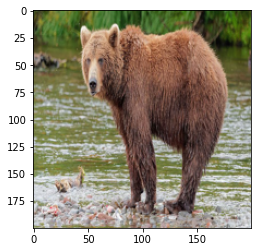

In [110]:
# Verificando as novas dimensões:
print(image_resize.size)

(200, 200)

pyplot.imshow(image_resize)

# Invertendo Imagens (Flip)

É muito utilizado quando estamos trabalhando com machine learning e deep learning para gerar dados diferentes para o nosso conjunto de treinamento afim de diminuir o overfitting e com isso obter melhores resultados.

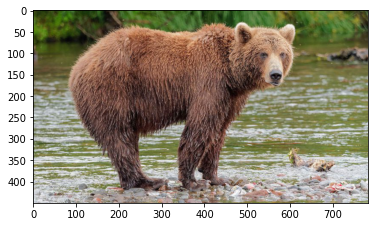

In [111]:
# Inversão horizontal:
horizontal_image = image.transpose(Image.FLIP_LEFT_RIGHT)

# Visualizando a imagem:
pyplot.imshow(horizontal_image)

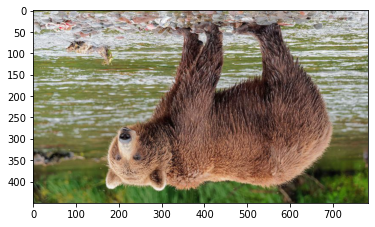

In [112]:
# Inversão vertical:
vertical_image = image.transpose(Image.FLIP_TOP_BOTTOM)

# Visualizando a imagem:
pyplot.imshow(vertical_image)

# Girar Imagens (Rotate)

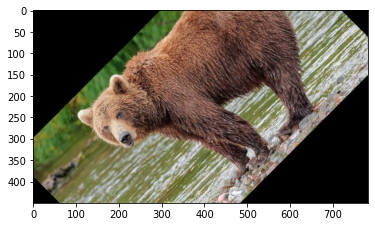

In [113]:
# Carregando novamente a imagem:
image = Image.open("urso1.jpg")

# Rotacionando a imagem em 45 graus:
pyplot.imshow(image.rotate(45))

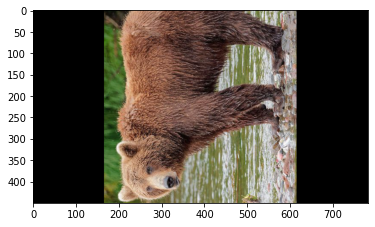

In [114]:
# Rotacionando a imagem em 90 graus:
pyplot.imshow(image.rotate(90))

Carregamos a imagem várias vezes para garantir que as transformações sejam feitas a partir da imagem original.

# Cortar Imagens (Crop)

Permite cortar as imagens a partir de coordenadas especificas.



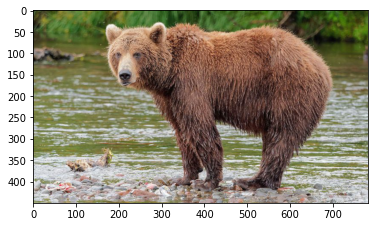

In [115]:
# Exibindo a imagem original:
pyplot.imshow(image)

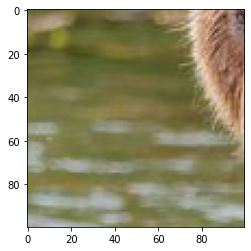

In [116]:
# Exibindo o corte a partir das coordenadas especificadas - left, upper, right, and lower:
pyplot.imshow(image.crop((100,100,200,200)))

# Técnicas de pré-processamento aplicado a imagens

Os algoritmos de machine learning esperam que as imagens estejam em uma determinada escala ou distribuição.

In [117]:
# Normalizando valores de pixels:
image = Image.open("urso1.jpg")

In [118]:
# Convertendo a imagem em um array:
pixels = asarray(image)

In [119]:
# Verificando a faixa de valores entre 0 e 255:
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


In [120]:
# Converte os valores inteiros em float para realizar a operação:
pixels = pixels.astype('float32')

In [121]:
# Normaliza a faixa de valores:
pixels /= pixels.max()

In [122]:
# Verificando a faixa de valores normalizada:
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: float32
Min: 0.000, Max: 1.000
